<a href="https://colab.research.google.com/github/Namtk214/AIO-Homework/blob/main/Genetic_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!gdown 1dSiUf-a7m34gUl3LLPmKDS6-v5sRBUZ0

Downloading...
From: https://drive.google.com/uc?id=1dSiUf-a7m34gUl3LLPmKDS6-v5sRBUZ0
To: /content/advertising.csv
100% 4.06k/4.06k [00:00<00:00, 7.70MB/s]


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
random.seed(0)

def load_data_from_file(filename = '/content/advertising.csv'):
  data = np.genfromtxt(filename, delimiter=',', skip_header=1)
  features_X = data[:, :3]
  sales_Y = data[:, 3]
  features_X = np.vstack((np.ones((features_X.shape[0],)), features_X.T)).T

  return features_X, sales_Y

X, Y = load_data_from_file()
Y.shape

(200,)

In [3]:
def create_individual(n=4, bound=10):
  individual = []
  for i in range(n):
    individual.append(random.uniform(-bound/2, bound/2))
  return individual

create_individual()

[3.4442185152504816,
 2.5795440294030243,
 -0.79428419169155,
 -2.4108324970703663]

In [4]:
features_X , sales_Y = load_data_from_file()

def compute_loss(individual):
  theta = np.array(individual)
  y_hat = X.dot(theta)
  loss = np.multiply(y_hat - sales_Y, y_hat - sales_Y).mean()
  return loss

def compute_fitness(individual):
  loss = compute_loss(individual)
  fitness_value = 0
  if loss > 0:
    fitness_value = 1/loss
  return fitness_value



In [5]:
features_X , sales_Y = load_data_from_file()
individual = [4.09 , 4.82 , 3.10 , 4.02]
fitness_score = compute_fitness(individual)
print(fitness_score)

1.0186001912541925e-06


In [6]:

def crossover(individual1, individual2, crossover_rate = 0.9):
  individual1_new = individual1.copy()
  individual2_new = individual2.copy()
  for i in range(len(individual1)):
    if random.random() < crossover_rate:
      individual1_new[i] = individual2[i]
      individual2_new[i] = individual1[i]
  return individual1_new, individual2_new

individual1 = [4.09 , 4.82 , 3.10 , 4.02]
individual2 = [3.44 , 2.57 , -0.79 , -2.41]
individual1 , individual2 = crossover ( individual1 , individual2 , 2.0)
print (" individual1 : " , individual1 )
print (" individual2 : " , individual2 )

 individual1 :  [3.44, 2.57, -0.79, -2.41]
 individual2 :  [4.09, 4.82, 3.1, 4.02]


In [7]:

def mutate(individual, mutation_rate = 0.1, bound=10 ):
  individual_new = individual.copy()
  for i in range(len(individual)):
    if random.random() < mutation_rate:
      individual_new[i] = random.uniform(-bound/2, bound/2)
  return individual_new

before_individual = [4.09 , 4.82 , 3.10 , 4.02]
after_individual = mutate ( individual , mutation_rate = 2.0)
print ( before_individual == after_individual )

False


In [8]:
def initializePopulation(m):
  population = []
  for i in range(m):
    individual = create_individual()
    population.append(individual)
  return population

In [9]:
def selection(sorted_old_population, m=100):
  index1 = random.randint(0, m-1)
  while True:
    index2 = random.randint(0, m-1)
    if index1 != index2:
      break
  individual_n = sorted_old_population[index1]
  if index2 > index1:
    individual_n = sorted_old_population[index2]
  return individual_n

In [10]:
def create_new_population(old_population, elitism=2, gen=10):
  m = len(old_population)
  sorted_population = sorted(old_population, key=compute_fitness)

  if gen%1 == 0:
    print (" Best loss :" , compute_loss ( sorted_population [m -1]) , " with chromsome : " ,
    sorted_population [m -1])
  new_popultion = []
  while len(new_popultion) < m-elitism:
    # selection
    individual_1 = selection(sorted_population, m)
    individual_2 = selection(sorted_population, m)
    # cross over
    individual_1, individual_2 = crossover(individual_1, individual_2)
    # mutation
    individual_1 = mutate(individual_1)
    individual_2 = mutate(individual_2)
    # add to new population
    new_popultion.append(individual_1)
    new_popultion.append(individual_2)
  return new_popultion, compute_loss(sorted_population[m-1])





In [11]:
individual1 = [4.09 , 4.82 , 3.10 , 4.02]
individual2 = [3.44 , 2.57 , -0.79 , -2.41]
old_population = [ individual1 , individual2 ]
new_population , _ = create_new_population ( old_population , elitism =2 , gen =1)

 Best loss : 123415.051528805  with chromsome :  [3.44, 2.57, -0.79, -2.41]


In [12]:
def run_GA():
  n_generation = 100
  m = 600
  features_X , sales_Y = load_data_from_file()
  population = initializePopulation(m)
  losses_list = []
  for gen in range(n_generation):
    population, loss = create_new_population(population, elitism=2, gen=gen)
    losses_list.append(loss)
  return losses_list
losses_list = run_GA()

 Best loss : 499.4287054364574  with chromsome :  [3.331600837968306, -0.09720038244186391, 1.4498755629428342, -0.2732124726990648]
 Best loss : 64.67263189599188  with chromsome :  [1.7562907486623676, 0.022221826851781756, -0.1332194184767852, 0.3274371896192978]
 Best loss : 64.67263189599188  with chromsome :  [1.7562907486623676, 0.022221826851781756, -0.1332194184767852, 0.3274371896192978]
 Best loss : 44.92255876063996  with chromsome :  [1.7562907486623676, 0.022221826851781756, 0.5380651650397024, -0.07604172649844188]
 Best loss : 44.92255876063996  with chromsome :  [1.7562907486623676, 0.022221826851781756, 0.5380651650397024, -0.07604172649844188]
 Best loss : 44.92255876063996  with chromsome :  [1.7562907486623676, 0.022221826851781756, 0.5380651650397024, -0.07604172649844188]
 Best loss : 54.92075477771544  with chromsome :  [-1.4944252668192304, 0.022221826851781756, 0.5380651650397024, -0.07604172649844188]
 Best loss : 54.92075477771544  with chromsome :  [-1.4944

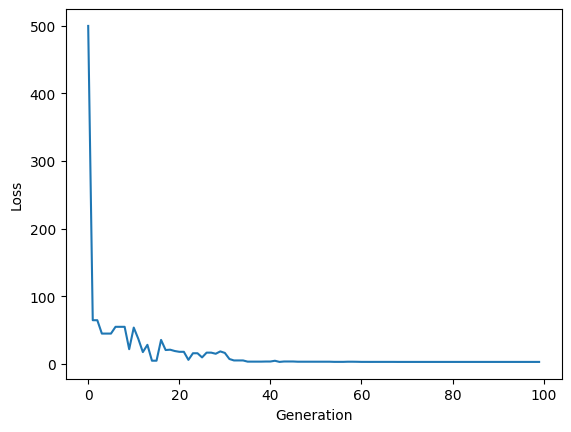

In [13]:
def visualize_losses(losses_list):
  plt.plot(losses_list)
  plt.xlabel("Generation")
  plt.ylabel("Loss")
  plt.show()

visualize_losses(losses_list)

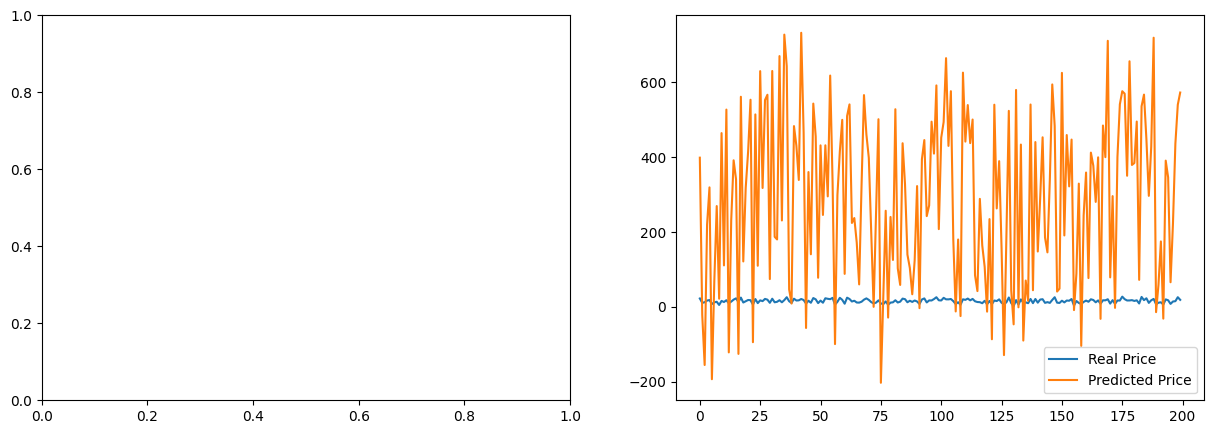

In [14]:
sorted_population = sorted(old_population, key=compute_fitness)
m = len(old_population)
def visualize_predict_gt():
  fig, axes = plt.subplots(1, 2, figsize=(15, 5))
  plt.plot(sales_Y, label='Real Price')
  plt.plot(X.dot(sorted_population[m-1]), label='Predicted Price')
  plt.legend()
  plt.show()

visualize_predict_gt()